## Условие задачи
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

### Описание данных

<li> contract.csv - информация о договоре; </li>
<li> personal.csv — персональные данные клиента; </li>
<li> internet.csv — информация об интернет-услугах; </li>
<li> phone.csv — информация об услугах телефонии. </li>

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_contract = pd.read_csv('D:/Data science/data/contract.csv')
df_internet = pd.read_csv('D:/Data science/data/internet.csv')
df_personal = pd.read_csv('D:/Data science/data/personal.csv')
df_phone = pd.read_csv('D:/Data science/data/phone.csv')

In [3]:
# Посмотрим краткую информацию по каждому из csv-файлов
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [5]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Заметно, что в датафреймах, в которых имеется персональная информация и информация о договоре, наибольшее количество строк. Из этого факта можно сделать предположение, что в других датафреймах нет данных по некоторым пользователям. Таким образом, можно предположить, что если нет данных в phone.csv и internet.csv по некоторым пользователям, то значит они не подключали себе телефонные или интернетные услуги. Преобразуем все данные в один датафрейм и проверим предположение.

In [7]:
df = df_contract.merge(df_personal, on = 'customerID')
df = df.merge(df_internet, on = 'customerID', how = 'left')
df = df.merge(df_phone, on = 'customerID', how = 'left')

In [8]:
#df.info()
df.isnull().sum()
# заменим все NaN на No, кроме столбца MultipleLines - здесь заменим на то, что человек не пользуется телефоном

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [9]:
df['MultipleLines'] = df['MultipleLines'].fillna('No phone')
df = df.fillna('No')
#df.info()

In [10]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No phone
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No phone
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Смотря на данные и их информацию, можно выявить очевидные две проблемы: необходимо сменить тип данных для totalcharges и нужно что-то придумать со столбцами BeginDate и EndDate. На данный момент их никак нельзя использовать, однако они имеют огромное значение, так как показывают срок пользования услугами и ушел ли пользователь или нет. 

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [12]:
# Используем категоризацию и "возьмем" из данных информацию о том, ушел ли клиент
def client_outflow(enddate):
    if enddate == 'No':
        return 'No'
    if enddate != 'No':
        return 'Yes'
df['ClientOutflow'] = df['EndDate'].apply(client_outflow)

In [13]:
# Так как информация актуальна на 1 февраля 2020, то заменим все значения No в EndDate именно на это число
df['EndDate'] = df['EndDate'].replace('No', '2020-02-01 00:00:00')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d')
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')

In [14]:
# Найдем количество месяцев между началом и окончанием договора 
# (в случае действующих пользователей - количество месяцев использования)
df['month'] = (pd.DatetimeIndex(df['EndDate']).year - pd.DatetimeIndex(df['BeginDate']).year)*12 + pd.DatetimeIndex(df['EndDate']).month - pd.DatetimeIndex(df['BeginDate']).month

In [15]:
# Удалим BeginDate и EndDate
df = df.drop(['BeginDate', 'EndDate'], axis=1)

Обработав данные, можно приступить к **исследовательскому анализу данных.**

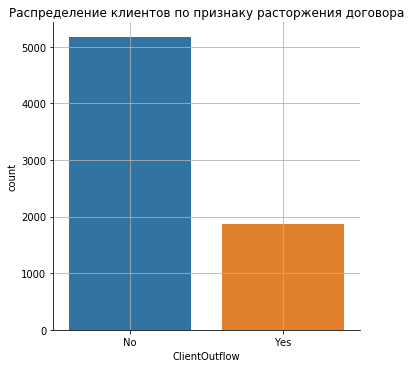

In [16]:
# Для начала посмотрим соотношение действующих и ушедших клиентов
def catplot(data, title):
    ax = sns.catplot(x='ClientOutflow', kind = 'count', data=data)
    plt.title(title)
    plt.grid()
catplot(df, 'Распределение клиентов по признаку расторжения договора')
# Отметим, что ~30% клиентов расторгли договор, что может сильно повлиять на компанию

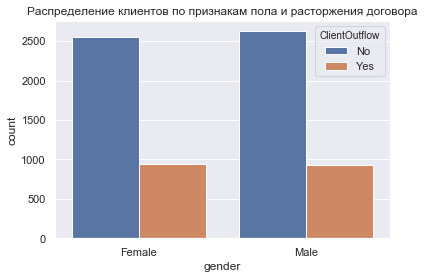

In [17]:
# Рассмотрим более детально, кто же эти люди, которые расторгают договор (негодяи!)
def countplot_x(feature, hue, title):
    sns.set()
    sns.countplot(feature, hue = hue)
    plt.title(title)
countplot_x(df['gender'], df['ClientOutflow'], 'Распределение клиентов по признакам пола и расторжения договора')

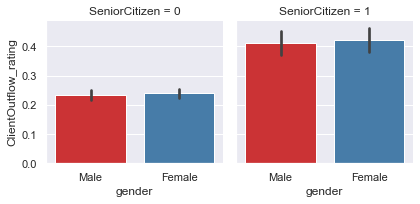

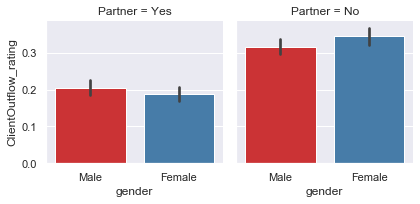

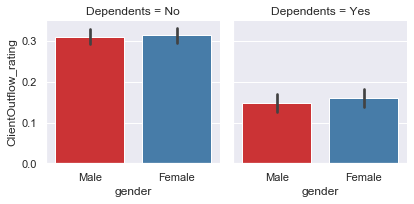

In [18]:
# Рассмотрим теперь как влияют другие признаки (пожилой ли человек, есть ли у него иждивенец или партнер)
# Воспользуемся возможностью seaborn для постройки совместных распределений
df['ClientOutflow_rating'] = df['ClientOutflow'].replace('No', 0)
df['ClientOutflow_rating'] = df['ClientOutflow_rating'].replace('Yes', 1)
def facetgrid(feature, x, order):
    g = sns.FacetGrid(df, col = feature)
    ax = g.map(sns.barplot, x, 'ClientOutflow_rating', order = order, palette = 'Set1')
facetgrid('SeniorCitizen', 'gender', ['Male', 'Female'])
facetgrid('Partner', 'gender', ['Male', 'Female'])
facetgrid('Dependents', 'gender', ['Male', 'Female'])

<li> пол не является показателем оттока клиентов; </li>
<li> количество людей пенсионного возраста значительно меньше, чем молодого поколения, однако отток пожилых людей почти в 2 раза больше, чем для молодых людей; </li>
<li> люди, не имеющие партнера, более склонны к расторжению договора; </li>
<li> люди без иждивенцев тоже склонны к уходу; </li>

Последние 2 пункта являются довольно странными - интернет и телефон не нужен тем, кто не имеет партнера или иждивенца.

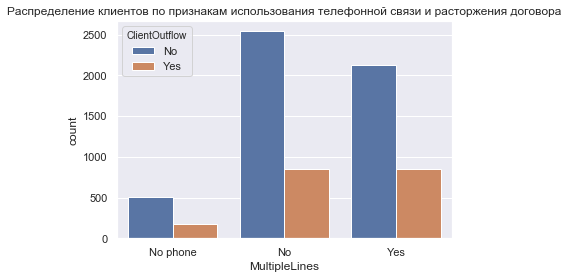

In [19]:
# Посмотрим на соотношения использования интернета и телефона
countplot_x(df['MultipleLines'], df['ClientOutflow'], 'Распределение клиентов по признакам использования телефонной связи и расторжения договора')

<li> довольно мало пользователей, которые не пользуются телефонными услугами </li>
<li> относительный отток клиентов больше для клиентов с несколькими линиями телефонной связи </li>

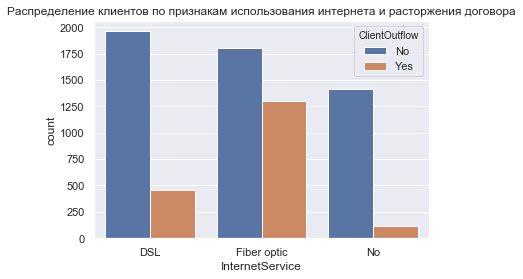

In [20]:
countplot_x(df['InternetService'], df['ClientOutflow'], 'Распределение клиентов по признакам использования интернета и расторжения договора')

<li> приобладает отток клиентов для категории с интернетом через оптоволокно - нестабильный интернет всех пугает, плохой звоночек! </li>
<li> для тех, кто не пользуется интернетом - наименьший относительный отток - может и правда, ужасное качество интернета через оптоволокно отпугивает клиентов? Нужно это выяснить! </li>

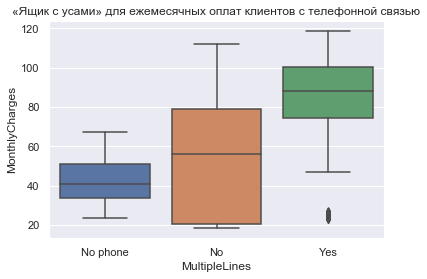

In [21]:
# Посмотрим "ящик с усами" для пользователей с интернетом и телефонной связи
def boxplot(x, y, title):
    sns.boxplot(x = x, y = y, data = df)
    plt.title(title)
boxplot('MultipleLines', 'MonthlyCharges', '«Ящик с усами» для ежемесячных оплат клиентов с телефонной связью')

Опираясь на выводы, полученые с countplots, можно сказать, что:
<li> клиенты, которые используют несколько линий телефонной связи, в 1,5 раза больше платят, чем другие клиенты </li>
<li> интерквартильный размах для клиентов, которые не используют несколько линий связи, огромен - это в свою очередь означает, что данные очень разрозненны и, судя по всему, несколько смещены к меньшим значениям. Этот факт может повлиять на обучение нашей модели </li> 

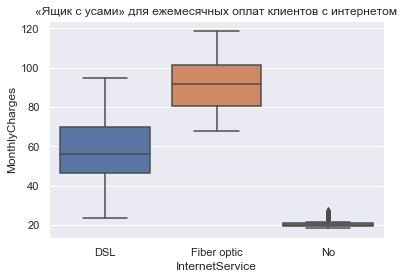

In [22]:
boxplot('InternetService', 'MonthlyCharges', '«Ящик с усами» для ежемесячных оплат клиентов с интернетом')

<li> клиенты на интернете с оптоволокном, как правило, платят больше, но при этом и отток довольно большой </li>
<li> клиенты же с интернетом по телефонной линии платят меньше, при этом и отток значительно меньше, однако известно, что скорость такого интернета значительно ниже - значит ли это то, что люди просто привыкли к этому или нет хорошей альтернативы? Возможно, это потенциальные "перебежчики" </li>

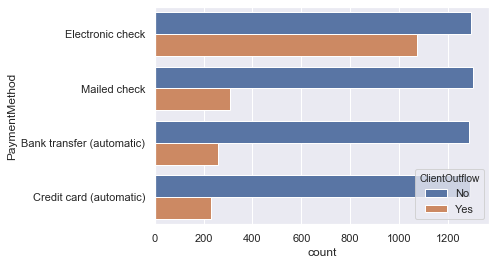

In [23]:
# Посмотрим как влияет путь и тип оплаты
def countplot_y(feature, hue, tittle):
    sns.set()
    sns.countplot(y = feature, hue = hue)
countplot_y(df['PaymentMethod'], df['ClientOutflow'], 'Распределение клиентов по оплате и расторжению договора')

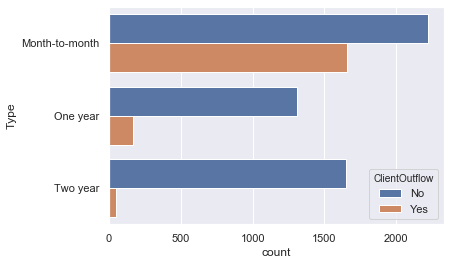

In [24]:
countplot_y(df['Type'], df['ClientOutflow'], 'Распределение клиентов по оплате и расторжению договора')

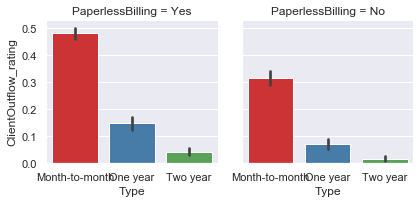

In [25]:
facetgrid('PaperlessBilling', 'Type', ['Month-to-month', 'One year', 'Two year'])

<li> Предпочтительным вариантом оплаты является электронный чек, однако именно такой вариант отличается высоким оттоком клиентов; </li>
<li> Клиенты, которые оплачивают по месяцам, склонны к расторжению контракту: возможно, что несмотря на плохое обслуживание, те люди, которые оплатили сразу на год или два, не хотят терять деньги и пользуются во вред себе; </li>
<li> Исходя из facetgrid и прошлых пунктов, скорее всего, людей с безбумажным биллингом больше </li>

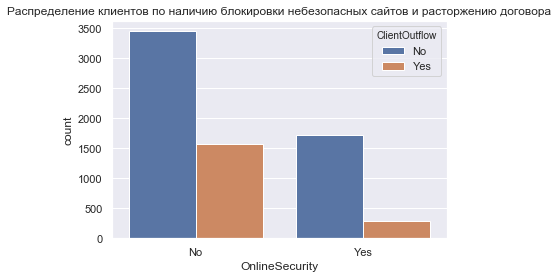

In [26]:
# Посмотрим как влияют различные дополнительные услуги при подключении интернета
countplot_x(df['OnlineSecurity'], df['ClientOutflow'], 'Распределение клиентов по наличию блокировки небезопасных сайтов и расторжению договора')

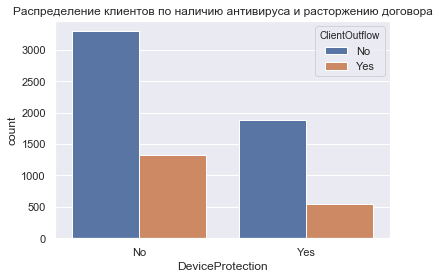

In [27]:
countplot_x(df['DeviceProtection'], df['ClientOutflow'], 'Распределение клиентов по наличию антивируса и расторжению договора')

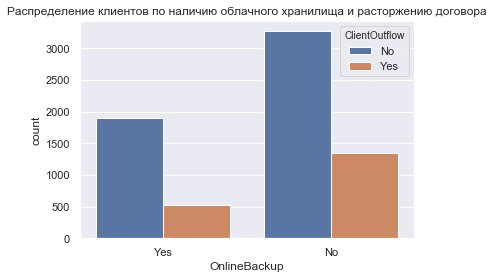

In [28]:
countplot_x(df['OnlineBackup'], df['ClientOutflow'], 'Распределение клиентов по наличию облачного хранилища и расторжению договора')

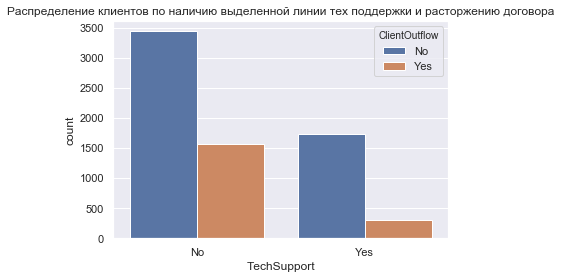

In [29]:
countplot_x(df['TechSupport'], df['ClientOutflow'], 'Распределение клиентов по наличию выделенной линии тех поддержки и расторжению договора')

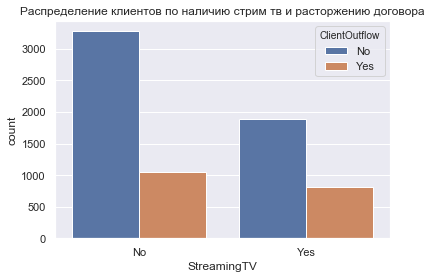

In [30]:
countplot_x(df['StreamingTV'], df['ClientOutflow'], 'Распределение клиентов по наличию стрим тв и расторжению договора')

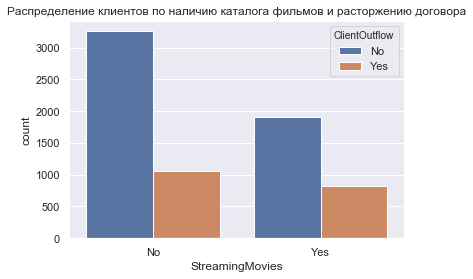

In [31]:
countplot_x(df['StreamingMovies'], df['ClientOutflow'], 'Распределение клиентов по наличию каталога фильмов и расторжению договора')

Исходя из анализа дополнительных услуг, можно предположить, что компания предлагает разные по качеству/цене услуги:
<li> те клиенты, кто не подключает блокировку небезопасных сайтов, чаще расторгают договор; </li>
<li> клиенты, которые подключали стриминговое тв или каталог фильмов, имеют более выраженный относительный отток - видимо, связано с качество интернета; </li>

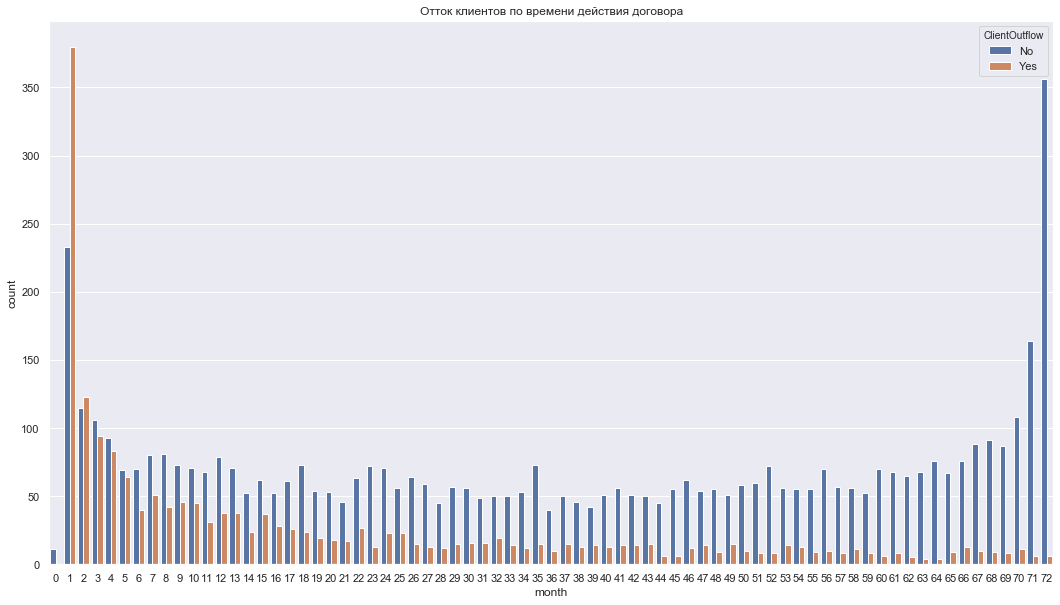

In [32]:
# Посмотрим на то как меняется отток людей во времени
plt.figure(figsize = (18, 10))
countplot_x(df['month'], df['ClientOutflow'], 'Отток клиентов по времени действия договора')

График показывает нам то, что многие клиенты в первые месяцы расторгают договор, затем таких случаев становится все меньше и меньше со временем. Таким образом, спустя время отношение тех, кто остался, к тем, кто расторгнул договор становится все больше и больше.

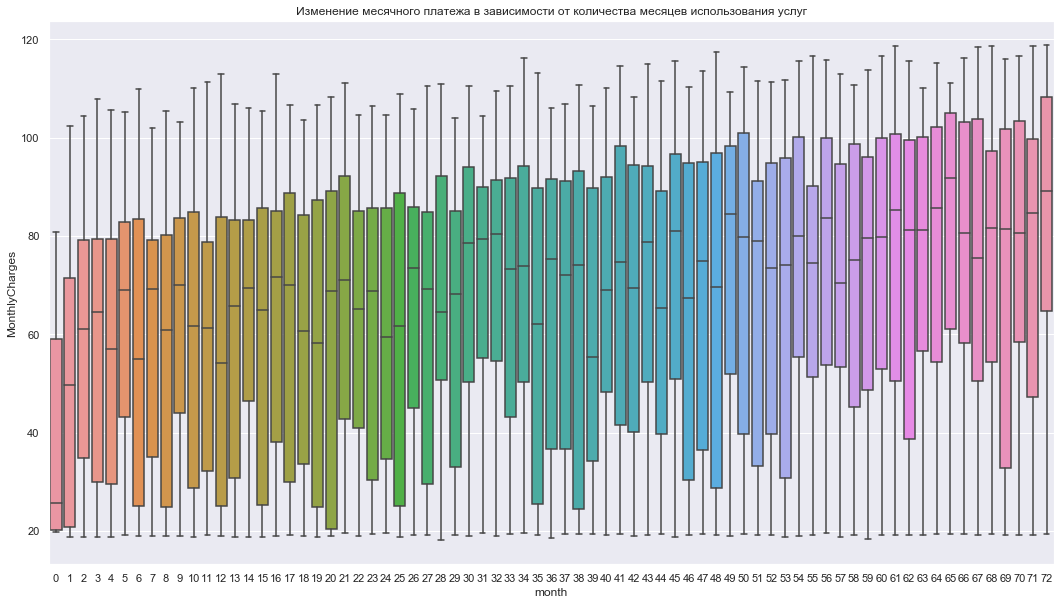

In [33]:
# посмотрим как меняется месячный платеж в зависимости от количества месяцев использования услуг
plt.figure(figsize = (18, 10))
boxplot('month', 'MonthlyCharges', 'Изменение месячного платежа в зависимости от количества месяцев использования услуг')

Можно заметить, что, в среднем, чем дольше пользуемся услугами компании, тем больше у клиентов ежемесячный чек.
При этом отток клиентов с течением времени уменьшается. Что это значит? Для компании важно удерживать новоприбывших клиентов.

In [34]:
# Посмотрим как коррелирует уход клиентов с другими фичами
corr_data = pd.get_dummies(data=df.drop(['customerID', 'ClientOutflow_rating'], axis=1))
corr_data = corr_data.corr()
corr_data['ClientOutflow_Yes'].sort_values()

ClientOutflow_No                          -1.000000
month                                     -0.352229
Type_Two year                             -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.198324
PaperlessBilling_No                       -0.191825
Type_One year                             -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtection_Yes                      -0.066160
StreamingTV_No                            -0.063228
StreamingMovies_No                        -0.061382
MultipleLine

**То, что было ранее показано на графиках, подтверждается и расчетом:**
<li> клиенты, которые оплачивают помесячно услуги, имеют интернет с оптоволокном, оплачивают электронно, чаще всего уходят расторгают договор; </li>
<li> клиенты, которые находятся в компании ни один месяц, не пользуются интернетом и заключают договор на 2 года, предпочитают остаться. </li>

In [35]:
#plt.figure(figsize = (18,10))
#sns.heatmap(corr_data.corr(), cmap='coolwarm',annot=True)

### Дальнейший план работы 
1. Необходимо подготовить данные - применить прямое кодирование (get_dummies), выделить target и features, разделить данные на тренировочную и тестовую выборки.
2. Выбор модели - применить различные модели классификации (вероятно, что логистическая регрессия справится с этой задачей наилучшим образом, ибо задача довольно типична для неё), определить наилучшие для них параметры c помощью SearchCV и определить метрику качества, по которой будем оценивать (возможно, что наилучшая метрика качества будет F1-мера, посколько данные несбалансированы).
3. Сделать выводы по исследовательскому анализу и работе в целом. 